# Stylometry

This notebook is designed to reproduce several findings from Emily Thornbury's chapter "The Poet Alone" in her book *Becoming a Poet in Anglo-Saxon England.* In particular, Fig. 4.5 on page 170.

First, however, we're going to think about what we might do with lists of strings. After all, how else can we count features of a string unless we can somehow make a list of items out of it?

## Lists

Here's a list:

In [1]:
["þæt", "wearð", "underne"]

['þæt', 'wearð', 'underne']

How do I know?

In [2]:
type(["þæt", "wearð", "underne"])

list

We can assign these to variables too!

In [3]:
first_hemistich = ["þæt", "wearð", "underne"]
second_hemistich = ["eorðbuendum"]
print(first_hemistich)
print(second_hemistich)

['þæt', 'wearð', 'underne']
['eorðbuendum']


And perform mathematical operations:

In [4]:
print(first_hemistich + second_hemistich)

['þæt', 'wearð', 'underne', 'eorðbuendum']


Let's assign that to `first_line`:

In [5]:
first_line = first_hemistich + second_hemistich
print(first_line)

['þæt', 'wearð', 'underne', 'eorðbuendum']


You can get the length of a `list` using the `len` function:

In [6]:
len(first_line)

4

You can index lists with brackets `[]`, let's get the first word of the first line:

In [7]:
print(first_line[1])

wearð


<div class="alert alert-danger">
Don't forget, Python (and many other langauges) start counting from 0.
</div>

In [8]:
print(first_line[0])

þæt


You can get ranges using a semi-colon `:`

In [9]:
print(first_line[:2])
print(type(first_line[:2]))

['þæt', 'wearð']
<class 'list'>


## Challenge 1

- Concatenate the first three lines of Christ and Satan.
- Retrieve the third element from the combined list.
- Retrieve the fourth through sixth elements from the combined list.

In [10]:
first_line = ['þæt', 'wearð', 'underne', 'eorðbuendum,']
second_line = ['þæt', 'meotod', 'hæfde', 'miht', 'and', 'strengðo']
third_line = ['ða', 'he', 'gefestnade', 'foldan', 'sceatas.']

In [11]:
combined_list=first_line+second_line+third_line
combined_list[2]

'underne'

In [12]:
combined_list[3:6]

['eorðbuendum,', 'þæt', 'meotod']

---

## List Comprehension

For now, think of a list comprehension as a fast way to sift out items from a list, instead of writing a `for` loop that appends to a new one.

In [13]:
[word for word in first_line if "e" in word]

['wearð', 'underne', 'eorðbuendum,']

***INSTEAD OF***

In [14]:
has_e = []

for donut in first_line:
    if "e" in donut:
        has_e.append(donut)

has_e

['wearð', 'underne', 'eorðbuendum,']

Now you know why list comprehensions are one of the best parts of Python!

Especially for text analysis, these will come in handy when we want to parse and sift through text.

## Challenge 2

- Concatenate the first three lines of Christ and Satan.
- Create a new list that contains only the words whose ***last*** letter is "e"
- Create a new list that contains the ***first*** letter of each word.
- Create a new list that contains only words longer than ***two*** letters.

In [15]:
joint_lines=first_line+second_line+third_line
joint_lines

['þæt',
 'wearð',
 'underne',
 'eorðbuendum,',
 'þæt',
 'meotod',
 'hæfde',
 'miht',
 'and',
 'strengðo',
 'ða',
 'he',
 'gefestnade',
 'foldan',
 'sceatas.']

In [16]:
[word for word in joint_lines if word.endswith("e")]

['underne', 'hæfde', 'he', 'gefestnade']

In [17]:
[word[0] for word in joint_lines]

['þ', 'w', 'u', 'e', 'þ', 'm', 'h', 'm', 'a', 's', 'ð', 'h', 'g', 'f', 's']

In [18]:
[word for word in joint_lines if len(word) >2]

['þæt',
 'wearð',
 'underne',
 'eorðbuendum,',
 'þæt',
 'meotod',
 'hæfde',
 'miht',
 'and',
 'strengðo',
 'gefestnade',
 'foldan',
 'sceatas.']

---

# Word Frequencies

In [19]:
with open('data/christ-and-satan.txt', 'r') as f:
    christ_and_satan = f.read()

In [20]:
tokens = christ_and_satan.split()

In [21]:
tokens

['þæt',
 'wearð',
 'underne',
 'eorðbuendum,',
 'þæt',
 'meotod',
 'hæfde',
 'miht',
 'and',
 'strengðo',
 'ða',
 'he',
 'gefestnade',
 'foldan',
 'sceatas.',
 'Seolfa',
 'he',
 'gesette',
 'sunnan',
 'and',
 'monan,',
 '5',
 'stanas',
 'and',
 'eorðan,',
 'stream',
 'ut',
 'on',
 'sæ,',
 'wæter',
 'and',
 'wolcn,',
 'ðurh',
 'his',
 'wundra',
 'miht.',
 'Deopne',
 'ymblyt',
 'clene',
 'ymbhaldeð',
 'meotod',
 'on',
 'mihtum,',
 'and',
 'alne',
 'middangeard.',
 'He',
 'selfa',
 'mæg',
 'sæ',
 'geondwlitan,',
 '10',
 'grundas',
 'in',
 'geofene,',
 'godes',
 'agen',
 'bearn,',
 'and',
 'he',
 'ariman',
 'mæg',
 'rægnas',
 'scuran,',
 'dropena',
 'gehwelcne.',
 'Daga',
 'enderim',
 'seolua',
 'he',
 'gesette',
 'þurh',
 'his',
 'soðan',
 'miht.',
 'Swa',
 'se',
 'wyrhta',
 'þurh',
 'his',
 'wuldres',
 'gast',
 '15',
 'serede',
 'and',
 'sette',
 'on',
 'six',
 'dagum',
 'eorðan',
 'dæles,',
 'up',
 'on',
 'heofonum,',
 'and',
 'heanne',
 'holm.',
 'Hwa',
 'is',
 'þæt',
 'ðe',
 'cunne',


Looks like a decent start. But we still have verse numbering in there, as well as some punctuation. What if we just want the words?

In [22]:
from string import punctuation, digits

In [23]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [24]:
digits

'0123456789'

Does it feel like time for a list comprehension? It should.

## Challenge 3

Write a list comprehension to remove line numbers and punctuation.

In [57]:
christ_and_satan=''.join([char for char in christ_and_satan if char not in punctuation + digits])
christ_and_satan

'þæt wearð underne      eorðbuendum \nþæt meotod hæfde      miht and strengðo \nða he gefestnade      foldan sceatas \nSeolfa he gesette      sunnan and monan \n\nstanas and eorðan      stream ut on sæ \nwæter and wolcn      ðurh his wundra miht \nDeopne ymblyt      clene ymbhaldeð \nmeotod on mihtum      and alne middangeard \nHe selfa mæg      sæ geondwlitan \n\ngrundas in geofene      godes agen bearn \nand he ariman mæg      rægnas scuran \ndropena gehwelcne      Daga enderim \nseolua he gesette      þurh his soðan miht \nSwa se wyrhta      þurh his wuldres gast \n\nserede and sette      on six dagum \neorðan dæles      up on heofonum \nand heanne holm      Hwa is þæt ðe cunne \norðonc clene      nymðe ece god \nDreamas he gedelde      duguðe and geþeode \n\nAdam ærest      and þæt æðele cyn \nengla ordfruman      þæt þe eft forwarð \nðuhte him on mode      þæt hit mihte swa \nþæt hie weron seolfe      swegles brytan \nwuldres waldend      Him ðær wirse gelamp \n\nða heo in helle  

In [26]:
tokens = christ_and_satan.split()
tokens

['þæt',
 'wearð',
 'underne',
 'eorðbuendum',
 'þæt',
 'meotod',
 'hæfde',
 'miht',
 'and',
 'strengðo',
 'ða',
 'he',
 'gefestnade',
 'foldan',
 'sceatas',
 'Seolfa',
 'he',
 'gesette',
 'sunnan',
 'and',
 'monan',
 'stanas',
 'and',
 'eorðan',
 'stream',
 'ut',
 'on',
 'sæ',
 'wæter',
 'and',
 'wolcn',
 'ðurh',
 'his',
 'wundra',
 'miht',
 'Deopne',
 'ymblyt',
 'clene',
 'ymbhaldeð',
 'meotod',
 'on',
 'mihtum',
 'and',
 'alne',
 'middangeard',
 'He',
 'selfa',
 'mæg',
 'sæ',
 'geondwlitan',
 'grundas',
 'in',
 'geofene',
 'godes',
 'agen',
 'bearn',
 'and',
 'he',
 'ariman',
 'mæg',
 'rægnas',
 'scuran',
 'dropena',
 'gehwelcne',
 'Daga',
 'enderim',
 'seolua',
 'he',
 'gesette',
 'þurh',
 'his',
 'soðan',
 'miht',
 'Swa',
 'se',
 'wyrhta',
 'þurh',
 'his',
 'wuldres',
 'gast',
 'serede',
 'and',
 'sette',
 'on',
 'six',
 'dagum',
 'eorðan',
 'dæles',
 'up',
 'on',
 'heofonum',
 'and',
 'heanne',
 'holm',
 'Hwa',
 'is',
 'þæt',
 'ðe',
 'cunne',
 'orðonc',
 'clene',
 'nymðe',
 'ece',

---

Python comes with the convenient `Counter` method from the `collections` library. It returns a `dictionary` like object that will return the frequency of a particular key.

In [27]:
from collections import Counter
cs_dict = Counter(tokens)

In [28]:
cs_dict

Counter({'þæt': 112,
         'wearð': 3,
         'underne': 1,
         'eorðbuendum': 1,
         'meotod': 9,
         'hæfde': 4,
         'miht': 7,
         'and': 130,
         'strengðo': 2,
         'ða': 8,
         'he': 53,
         'gefestnade': 1,
         'foldan': 7,
         'sceatas': 2,
         'Seolfa': 1,
         'gesette': 4,
         'sunnan': 2,
         'monan': 1,
         'stanas': 2,
         'eorðan': 10,
         'stream': 1,
         'ut': 5,
         'on': 81,
         'sæ': 2,
         'wæter': 1,
         'wolcn': 1,
         'ðurh': 3,
         'his': 23,
         'wundra': 1,
         'Deopne': 1,
         'ymblyt': 1,
         'clene': 2,
         'ymbhaldeð': 1,
         'mihtum': 3,
         'alne': 2,
         'middangeard': 4,
         'He': 5,
         'selfa': 1,
         'mæg': 7,
         'geondwlitan': 1,
         'grundas': 3,
         'in': 67,
         'geofene': 1,
         'godes': 18,
         'agen': 2,
         'bearn': 8,
      

In [29]:
cs_dict.keys()

dict_keys(['þæt', 'wearð', 'underne', 'eorðbuendum', 'meotod', 'hæfde', 'miht', 'and', 'strengðo', 'ða', 'he', 'gefestnade', 'foldan', 'sceatas', 'Seolfa', 'gesette', 'sunnan', 'monan', 'stanas', 'eorðan', 'stream', 'ut', 'on', 'sæ', 'wæter', 'wolcn', 'ðurh', 'his', 'wundra', 'Deopne', 'ymblyt', 'clene', 'ymbhaldeð', 'mihtum', 'alne', 'middangeard', 'He', 'selfa', 'mæg', 'geondwlitan', 'grundas', 'in', 'geofene', 'godes', 'agen', 'bearn', 'ariman', 'rægnas', 'scuran', 'dropena', 'gehwelcne', 'Daga', 'enderim', 'seolua', 'þurh', 'soðan', 'Swa', 'se', 'wyrhta', 'wuldres', 'gast', 'serede', 'sette', 'six', 'dagum', 'dæles', 'up', 'heofonum', 'heanne', 'holm', 'Hwa', 'is', 'ðe', 'cunne', 'orðonc', 'nymðe', 'ece', 'god', 'Dreamas', 'gedelde', 'duguðe', 'geþeode', 'Adam', 'ærest', 'æðele', 'cyn', 'engla', 'ordfruman', 'þe', 'eft', 'forwarð', 'ðuhte', 'him', 'mode', 'hit', 'mihte', 'swa', 'hie', 'weron', 'seolfe', 'swegles', 'brytan', 'waldend', 'Him', 'ðær', 'wirse', 'gelamp', 'heo', 'helle'

In [30]:
cs_dict.values()

dict_values([112, 3, 1, 1, 9, 4, 7, 130, 2, 8, 53, 1, 7, 2, 1, 4, 2, 1, 2, 10, 1, 5, 81, 2, 1, 1, 3, 23, 1, 1, 1, 2, 1, 3, 2, 4, 5, 1, 7, 1, 3, 67, 1, 18, 2, 8, 1, 1, 1, 1, 1, 1, 1, 2, 18, 1, 7, 35, 2, 24, 5, 1, 1, 1, 1, 1, 21, 10, 1, 1, 1, 32, 20, 2, 1, 1, 13, 20, 1, 1, 2, 1, 3, 4, 4, 2, 20, 1, 25, 8, 1, 2, 33, 4, 4, 9, 21, 13, 1, 2, 3, 1, 9, 7, 5, 1, 3, 17, 22, 27, 1, 1, 2, 1, 6, 2, 37, 1, 2, 1, 1, 1, 1, 11, 6, 5, 1, 4, 1, 2, 4, 1, 1, 1, 4, 2, 3, 7, 1, 2, 3, 4, 1, 10, 1, 1, 1, 2, 1, 4, 1, 20, 1, 1, 2, 1, 1, 4, 1, 8, 1, 33, 1, 8, 1, 1, 4, 1, 1, 1, 1, 4, 5, 3, 21, 4, 1, 3, 2, 2, 5, 1, 3, 3, 1, 1, 4, 17, 2, 3, 4, 1, 2, 3, 1, 1, 12, 1, 2, 1, 2, 4, 31, 11, 1, 45, 3, 10, 2, 13, 1, 3, 15, 33, 1, 1, 5, 2, 1, 3, 1, 15, 21, 1, 1, 1, 1, 7, 1, 2, 8, 2, 4, 5, 1, 3, 5, 5, 1, 11, 10, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 3, 46, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 66, 2, 1, 10, 3, 1, 1, 1, 1, 4, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 2, 4, 1, 5, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 13, 1, 1, 25, 2, 1, 1, 3, 1, 1, 

In [31]:
cs_dict.most_common()

[('and', 130),
 ('þæt', 112),
 ('on', 81),
 ('þa', 78),
 ('in', 67),
 ('to', 66),
 ('he', 53),
 ('mid', 46),
 ('ic', 45),
 ('þær', 37),
 ('se', 35),
 ('him', 33),
 ('we', 33),
 ('ne', 33),
 ('is', 32),
 ('drihten', 31),
 ('ham', 27),
 ('wæs', 27),
 ('þe', 25),
 ('ær', 25),
 ('þonne', 25),
 ('wuldres', 24),
 ('his', 23),
 ('helle', 22),
 ('up', 21),
 ('swa', 21),
 ('nu', 21),
 ('us', 21),
 ('ðe', 20),
 ('god', 20),
 ('engla', 20),
 ('of', 20),
 ('þæs', 19),
 ('godes', 18),
 ('þurh', 18),
 ('heo', 17),
 ('for', 17),
 ('æfre', 15),
 ('þu', 15),
 ('þam', 15),
 ('ece', 13),
 ('hie', 13),
 ('me', 13),
 ('geond', 13),
 ('þone', 13),
 ('ymb', 12),
 ('uppe', 12),
 ('ealle', 12),
 ('leoht', 11),
 ('wordum', 11),
 ('seolfa', 11),
 ('agan', 11),
 ('eorðan', 10),
 ('heofonum', 10),
 ('hu', 10),
 ('sceal', 10),
 ('Nu', 10),
 ('sunu', 10),
 ('Ic', 10),
 ('wolde', 10),
 ('Eala', 10),
 ('meotod', 9),
 ('mihte', 9),
 ('waldend', 9),
 ('dream', 9),
 ('ah', 9),
 ('moton', 9),
 ('ða', 8),
 ('bearn', 8),
 (

Believe it or not, even 1000 years ago "and" was still used all the time :) .

## Challenge 4

- A common measure of lexical diversity for a given text is its Type-Token Ratio: the average number of times each word in a text gets used.
- Calculate the Type-Token Ratio for Christ and Satan.

In [32]:
len(cs_dict.keys())/len(tokens)

0.3761405109489051

---

# Visualization

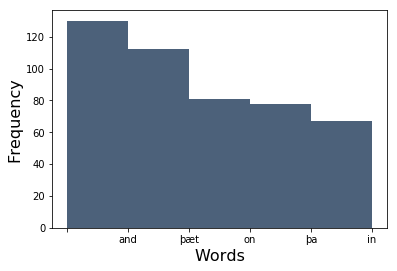

In [33]:
%matplotlib inline
from datascience import *
import numpy as np

words, frequency = zip(*cs_dict.items())

t = Table(["Words", "Frequency"])
t.append_column("Words", words)
t.append_column("Frequency", frequency)
top_table = t.sort("Frequency", descending="True").take(np.arange(5))
top_table.bar(column_for_categories="Words")

# Ad Hoc Stylometry

We can now put together our knowledge of strings, list comprehensions, and plotting frequencies to look at frequency of alliteration letters. Remember: Alliteration is the repetition of a sound at the beginning of two or more words in the same line.

Let's start by looking at the first letter of every word in the whole text:

In [34]:
cs_tokens = christ_and_satan.lower().split()
first_letters = [x[0] if x[0] not in ['a','e','i','o','u','y'] else 'a' for x in cs_tokens]
first_l_dict = Counter(first_letters)
first_l_freq = first_l_dict.most_common()
print(first_l_freq)

[('a', 981), ('h', 534), ('þ', 456), ('s', 378), ('w', 370), ('g', 336), ('m', 239), ('f', 168), ('b', 155), ('d', 150), ('n', 134), ('t', 101), ('ð', 90), ('æ', 89), ('l', 84), ('c', 83), ('r', 34), ('p', 2)]


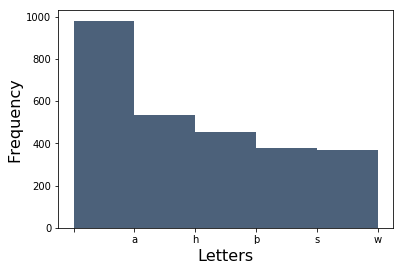

In [35]:
# plot
letters, frequency = zip(*first_l_dict.items())

t = Table(["Letters", "Frequency"])
t.append_column("Letters", letters)
t.append_column("Frequency", frequency)
top_table = t.sort("Frequency", descending="True").take(np.arange(5))
top_table.bar(column_for_categories="Letters")

Cool! But we need it within a line, and Thornbury specifically does it for each Fitt. What's a "Fitt"? It's a further division in poetry constituted by a group of lines. Luckily this is nicely delimited by double line breaks (`\n\n`).

In [36]:
cs_fitts = christ_and_satan.split('\n\n')
len(cs_fitts)

153

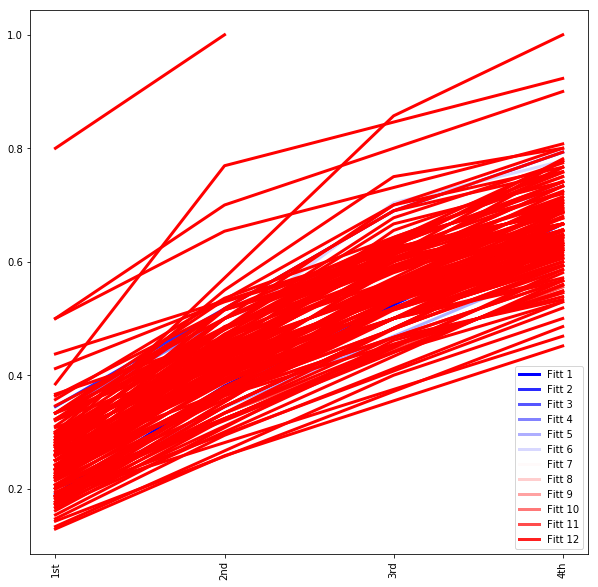

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
for i in range(len(cs_fitts)):
    
    # lowercase the string and get the tokens back
    fitt_tokens = cs_fitts[i].lower().split()
    
    # now we take the first letters
    # remember that in OE any vowel can alliterate with another, so we'll collapse this under 'a'
    # we're cheating a bit here, we should be determining alliteration by line not Fitt overall
    first_letters = [x[0] if x[0] not in ['a','e','i','o','u','y'] else 'a' for x in fitt_tokens]
    
    # use Counter to get the most common alliterations
    allit_freq = Counter(first_letters).most_common()

    # need keys for x axis
    common_keys = [x[0] for x in allit_freq]
    
    # need values for y axes
    common_values = [x[1] for x in allit_freq]
    
    # normalize so we can compare across Fitts despite different number of words
    normed_values = [x[1]/sum(common_values) for x in allit_freq]
    
    # add up to get cumulative alliteration of the four most preferred patterns
    cumulative_values = np.cumsum(normed_values)

    # add the Fitt to the plot
    plt.xticks(range(4), ['1st','2nd','3rd','4th'], rotation='vertical')
    plt.plot(cumulative_values[:4], color = plt.cm.bwr(i*.085), lw=3)
plt.legend(labels=['Fitt '+str(i+1) for i in range(12)], loc=0)

---

## Homework: Acrostics
In poetry, an acrostic is a message created by taking certain letters in a pattern over lines. One 9th century German writer, Otfrid of Weissenburg, was notorius for his early use of acrostics, one instance of which is in the text below: *Salomoni episcopo Otfridus*. His message can be found by taking the first character of every other line. Print Otfrid's message!

Source: http://titus.uni-frankfurt.de/texte/etcs/germ/ahd/otfrid/otfri.htm

In [38]:
text = '''si sálida gimúati      sálomones gúati, 
     ther bíscof ist nu édiles      kóstinzero sédales; 
     allo gúati gidúe thio sín,      thio bíscofa er thar hábetin, 
     ther ínan zi thiu giládota,      in hóubit sinaz zuívalta! 
     lékza ih therera búachi      iu sentu in suábo richi, 
     thaz ir irkíaset ubar ál,      oba siu frúma wesan scal; 
     oba ir hiar fíndet iawiht thés      thaz wírdig ist thes lésannes: 
     iz iuer húgu irwállo,      wísduames fóllo. 
     mir wárun thio iuo wízzi      ju ófto filu núzzi, 
     íueraz wísduam;      thes duan ih míhilan ruam. 
     ófto irhugg ih múates      thes mánagfalten gúates, 
     thaz ír mih lértut hárto      íues selbes wórto. 
     ni thaz míno dohti      giwérkon thaz io móhti, 
     odo in thén thingon      thio húldi so gilángon; 
     iz datun gómaheiti,      thio íues selbes gúati, 
     íueraz giráti,      nales míno dati. 
     emmizen nu ubar ál      ih druhtin férgon scal, 
     mit lón er iu iz firgélte      joh sínes selbes wórte; 
     páradyses résti      gébe iu zi gilústi; 
     ungilónot ni biléip      ther gotes wízzode kleip. 
     in hímilriches scóne      so wérde iz iu zi lóne 
     mit géltes ginúhti,      thaz ír mir datut zúhti. 
     sínt in thesemo búache,      thes gómo theheiner rúache; 
     wórtes odo gúates,      thaz lích iu iues múates: 
     chéret thaz in múate      bi thia zúhti iu zi gúate, 
     joh zellet tház ana wánc      al in íuweran thanc. 
     ofto wírdit, oba gúat      thes mannes júngoro giduat, 
     thaz es líwit thráto      ther zúhtari gúato. 
     pétrus ther rícho      lono iu es blídlicho, 
     themo zi rómu druhtin gráp      joh hús inti hóf gap; 
     óbana fon hímile      sént iu io zi gámane 
     sálida gimýato      selbo kríst ther gúato! 
     oba ih irbálden es gidár,      ni scal ih firlázan iz ouh ál, 
     nub ih ío bi iuih gerno      gináda sina férgo, 
     thaz hóh er iuo wírdi      mit sínes selbes húldi, 
     joh iu féstino in thaz múat      thaz sinaz mánagfalta gúat; 
     firlíhe iu sines ríches,      thes hohen hímilriches, 
     bi thaz ther gúato hiar io wíaf      joh émmizen zi góte riaf; 
     rihte íue pédi thara frúa      joh míh gifúage tharazúa, 
     tház wir unsih fréwen thar      thaz gotes éwiniga jár, 
     in hímile unsih blíden,      thaz wízi wir bimíden; 
     joh dúe uns thaz gimúati      thúruh thio síno guati! 
     dúe uns thaz zi gúate      blídemo múate! 
     mit héilu er gibóran ward,      ther io thia sálida thar fand, 
     uuanta es ni brístit furdir      (thes gilóube man mír), 
     nirfréwe sih mit múatu      íamer thar mit gúatu. 
     sélbo krist ther guato      firlíhe uns hiar gimúato, 
     wir íamer fro sin múates      thes éwinigen gúates!'''

In [39]:
# HINT: remember what % does, (maybe) lookup enumerate

Otfrid was more skillful than to settle for the first letter of every other line. What happens if you extract the last letter of the last word of each line, for every other line starting on the second line?

In [42]:
# HINT: first remove punctuation, tab is represented by \t
from string import punctuation

In [61]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [67]:
text=([char for char in christ_and_satan if char not in punctuation + digits])
text

['þ',
 'æ',
 't',
 ' ',
 'w',
 'e',
 'a',
 'r',
 'ð',
 ' ',
 'u',
 'n',
 'd',
 'e',
 'r',
 'n',
 'e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'e',
 'o',
 'r',
 'ð',
 'b',
 'u',
 'e',
 'n',
 'd',
 'u',
 'm',
 ' ',
 '\n',
 'þ',
 'æ',
 't',
 ' ',
 'm',
 'e',
 'o',
 't',
 'o',
 'd',
 ' ',
 'h',
 'æ',
 'f',
 'd',
 'e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'm',
 'i',
 'h',
 't',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 's',
 't',
 'r',
 'e',
 'n',
 'g',
 'ð',
 'o',
 ' ',
 '\n',
 'ð',
 'a',
 ' ',
 'h',
 'e',
 ' ',
 'g',
 'e',
 'f',
 'e',
 's',
 't',
 'n',
 'a',
 'd',
 'e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 'f',
 'o',
 'l',
 'd',
 'a',
 'n',
 ' ',
 's',
 'c',
 'e',
 'a',
 't',
 'a',
 's',
 ' ',
 '\n',
 'S',
 'e',
 'o',
 'l',
 'f',
 'a',
 ' ',
 'h',
 'e',
 ' ',
 'g',
 'e',
 's',
 'e',
 't',
 't',
 'e',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 ' ',
 's',
 'u',
 'n',
 'n',
 'a',
 'n',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'm',
 'o',
 'n',
 'a',
 'n',
 ' ',
 '\n',
 '\n',
 's',
 't',
 'a',
 'n',
 'a',
 's',
 ' ',
 'a',
 'n',

In [59]:
list(enumerate(text))

[(0, 's'),
 (1, 'i'),
 (2, ' '),
 (3, 's'),
 (4, 'á'),
 (5, 'l'),
 (6, 'i'),
 (7, 'd'),
 (8, 'a'),
 (9, ' '),
 (10, 'g'),
 (11, 'i'),
 (12, 'm'),
 (13, 'ú'),
 (14, 'a'),
 (15, 't'),
 (16, 'i'),
 (17, ' '),
 (18, ' '),
 (19, ' '),
 (20, ' '),
 (21, ' '),
 (22, ' '),
 (23, 's'),
 (24, 'á'),
 (25, 'l'),
 (26, 'o'),
 (27, 'm'),
 (28, 'o'),
 (29, 'n'),
 (30, 'e'),
 (31, 's'),
 (32, ' '),
 (33, 'g'),
 (34, 'ú'),
 (35, 'a'),
 (36, 't'),
 (37, 'i'),
 (38, ','),
 (39, ' '),
 (40, '\n'),
 (41, ' '),
 (42, ' '),
 (43, ' '),
 (44, ' '),
 (45, ' '),
 (46, 't'),
 (47, 'h'),
 (48, 'e'),
 (49, 'r'),
 (50, ' '),
 (51, 'b'),
 (52, 'í'),
 (53, 's'),
 (54, 'c'),
 (55, 'o'),
 (56, 'f'),
 (57, ' '),
 (58, 'i'),
 (59, 's'),
 (60, 't'),
 (61, ' '),
 (62, 'n'),
 (63, 'u'),
 (64, ' '),
 (65, 'é'),
 (66, 'd'),
 (67, 'i'),
 (68, 'l'),
 (69, 'e'),
 (70, 's'),
 (71, ' '),
 (72, ' '),
 (73, ' '),
 (74, ' '),
 (75, ' '),
 (76, ' '),
 (77, 'k'),
 (78, 'ó'),
 (79, 's'),
 (80, 't'),
 (81, 'i'),
 (82, 'n'),
 (83, 'z'),
 